This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) #random noise added to data

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit( #noisy data set
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
# It's common to do feature selection before training

Epoch 1/10
375/375 [==============================] - 7s 8ms/step - loss: 0.6163 - accuracy: 0.8134 - val_loss: 0.3095 - val_accuracy: 0.9072
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2374 - accuracy: 0.9253 - val_loss: 0.2029 - val_accuracy: 0.9436
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1535 - accuracy: 0.9529 - val_loss: 0.1430 - val_accuracy: 0.9578
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1077 - accuracy: 0.9666 - val_loss: 0.1376 - val_accuracy: 0.9597
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9745 - val_loss: 0.1233 - val_accuracy: 0.9635
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0578 - accuracy: 0.9810 - val_loss: 0.1148 - val_accuracy: 0.9676
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.1357 - val_accuracy: 0.9628
Epoch 

In [ ]:
model = get_model()
history1 = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.2885 - accuracy: 0.9165 - val_loss: 0.1566 - val_accuracy: 0.9515
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1206 - accuracy: 0.9648 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.0904 - val_accuracy: 0.9743
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0573 - accuracy: 0.9830 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0420 - accuracy: 0.9874 - val_loss: 0.0843 - val_accuracy: 0.9753
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0318 - accuracy: 0.9908 - val_loss: 0.0874 - val_accuracy: 0.9765
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0.0833 - val_accuracy: 0.9778
Epoch 

**Plotting a validation accuracy comparison**

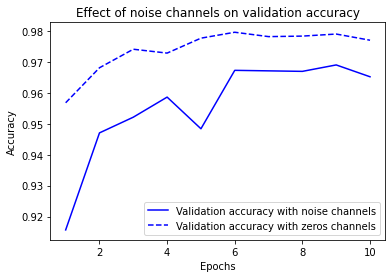

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

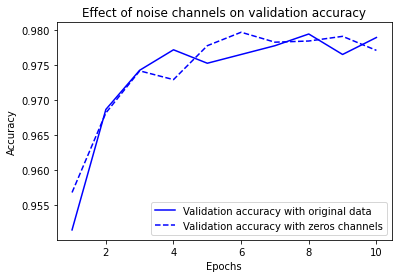

In [ ]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3158 - accuracy: 0.1040 - val_loss: 2.3069 - val_accuracy: 0.1013
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2998 - accuracy: 0.1178 - val_loss: 2.3161 - val_accuracy: 0.0976
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2902 - accuracy: 0.1267 - val_loss: 2.3218 - val_accuracy: 0.1118
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2765 - accuracy: 0.1394 - val_loss: 2.3290 - val_accuracy: 0.1029
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2568 - accuracy: 0.1550 - val_loss: 2.3408 - val_accuracy: 0.1008
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2357 - accuracy: 0.1700 - val_loss: 2.3495 - val_accuracy: 0.1043
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2098 - accuracy: 0.1880 - val_loss: 2.3657 - val_accuracy: 0.1034

In [ ]:
#accuracy 는 계속 오르지만 val_accuracy 는 10%

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # check gradient descend parameters
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 663.9348 - accuracy: 0.3297 - val_loss: 2.1212 - val_accuracy: 0.2295
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 3.4124 - accuracy: 0.2218 - val_loss: 21.5156 - val_accuracy: 0.2783
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7346 - accuracy: 0.2398 - val_loss: 2.4331 - val_accuracy: 0.2339
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 3.2224 - accuracy: 0.2323 - val_loss: 2.5607 - val_accuracy: 0.2190
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5881 - accuracy: 0.2366 - val_loss: 2.4008 - val_accuracy: 0.2297
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4826 - accuracy: 0.2368 - val_loss: 2.6300 - val_accuracy: 0.2517
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6125 - accuracy: 0.2466 - val_loss: 2.1896 - val_accuracy: 0.2361
Epo

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #appropriate learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3592 - accuracy: 0.9116 - val_loss: 0.1299 - val_accuracy: 0.9641
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1366 - accuracy: 0.9643 - val_loss: 0.1621 - val_accuracy: 0.9641
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1126 - accuracy: 0.9740 - val_loss: 0.1472 - val_accuracy: 0.9693
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0995 - accuracy: 0.9778 - val_loss: 0.1983 - val_accuracy: 0.9668
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0841 - accuracy: 0.9821 - val_loss: 0.2137 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0762 - accuracy: 0.9848 - val_loss: 0.1938 - val_accuracy: 0.9737
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.9864 - val_loss: 0.2531 - val_accuracy: 0.9731
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6797 - accuracy: 0.8292 - val_loss: 0.3605 - val_accuracy: 0.9035
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.9029 - val_loss: 0.3080 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3156 - accuracy: 0.9117 - val_loss: 0.2913 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2993 - accuracy: 0.9163 - val_loss: 0.2812 - val_accuracy: 0.9221
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2896 - accuracy: 0.9195 - val_loss: 0.2756 - val_accuracy: 0.9251
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9204 - val_loss: 0.2735 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9222 - val_loss: 0.2687 - val_accuracy: 0.9276
Epoch 

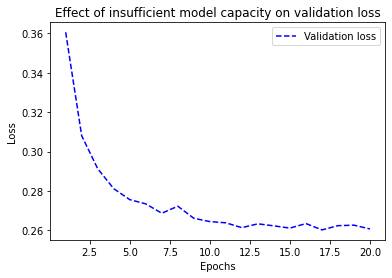

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3567 - accuracy: 0.8989 - val_loss: 0.1936 - val_accuracy: 0.9452
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1564 - accuracy: 0.9538 - val_loss: 0.1372 - val_accuracy: 0.9593
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.9676 - val_loss: 0.1134 - val_accuracy: 0.9674
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.9745 - val_loss: 0.1155 - val_accuracy: 0.9666
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9792 - val_loss: 0.0904 - val_accuracy: 0.9726
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.0922 - val_accuracy: 0.9731
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0951 - val_accuracy: 0.9733
Epoch 

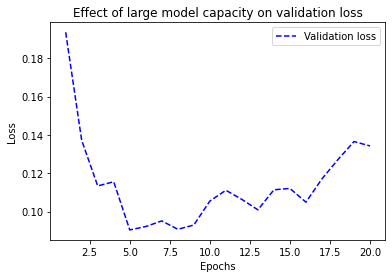

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.4980 - accuracy: 0.7851 - val_loss: 0.3610 - val_accuracy: 0.8761
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2869 - accuracy: 0.9037 - val_loss: 0.2916 - val_accuracy: 0.8911
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2090 - accuracy: 0.9323 - val_loss: 0.2876 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1658 - accuracy: 0.9456 - val_loss: 0.2742 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1329 - accuracy: 0.9569 - val_loss: 0.2894 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1079 - accuracy: 0.9669 - val_loss: 0.3049 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0921 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6263 - accuracy: 0.6177 - val_loss: 0.5764 - val_accuracy: 0.7558
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5397 - accuracy: 0.7811 - val_loss: 0.5280 - val_accuracy: 0.7648
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4891 - accuracy: 0.8434 - val_loss: 0.4943 - val_accuracy: 0.8302
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4516 - accuracy: 0.8815 - val_loss: 0.4709 - val_accuracy: 0.8634
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4207 - accuracy: 0.9064 - val_loss: 0.4545 - val_accuracy: 0.8600
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3941 - accuracy: 0.9243 - val_loss: 0.4434 - val_accuracy: 0.8616
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3698 - accuracy: 0.9367 - val_loss: 0.4334 - val_accuracy: 0.8643
Epoch 8/20
30

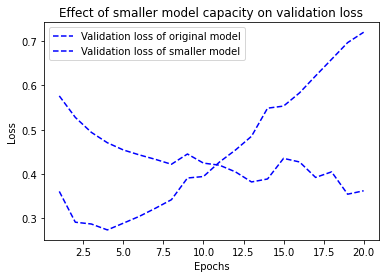

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5284 - accuracy: 0.7560 - val_loss: 0.3418 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2464 - accuracy: 0.9025 - val_loss: 0.2678 - val_accuracy: 0.8907
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1320 - accuracy: 0.9503 - val_loss: 0.5614 - val_accuracy: 0.8306
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0658 - accuracy: 0.9768 - val_loss: 0.4235 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0959 - accuracy: 0.9787 - val_loss: 0.4217 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.5455 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 5.5289e-04 - accuracy: 0.9999 - val_loss: 0.6843 - val_accuracy: 0.8848
Epoch 8/2

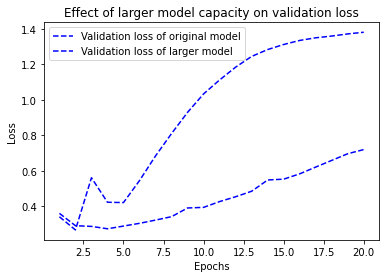

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6414 - accuracy: 0.7518 - val_loss: 0.5124 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4345 - accuracy: 0.8899 - val_loss: 0.4158 - val_accuracy: 0.8765
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3524 - accuracy: 0.9081 - val_loss: 0.3720 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3125 - accuracy: 0.9193 - val_loss: 0.3744 - val_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2874 - accuracy: 0.9316 - val_loss: 0.3716 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2722 - accuracy: 0.9362 - val_loss: 0.3699 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2591 - accuracy: 0.9370 - val_loss: 0.3631 - val_accuracy: 0.8842
Epoch 8/20
30

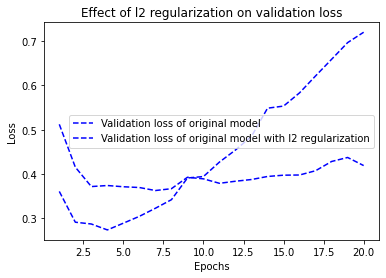

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of original model with l2 regularization")
plt.title("Effect of l2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6277 - accuracy: 0.6491 - val_loss: 0.5221 - val_accuracy: 0.8207
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5131 - accuracy: 0.7765 - val_loss: 0.4195 - val_accuracy: 0.8700
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4328 - accuracy: 0.8332 - val_loss: 0.3549 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3674 - accuracy: 0.8690 - val_loss: 0.3263 - val_accuracy: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3195 - accuracy: 0.8913 - val_loss: 0.2927 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2860 - accuracy: 0.9032 - val_loss: 0.2878 - val_accuracy: 0.8916
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2448 - accuracy: 0.9203 - val_loss: 0.2954 - val_accuracy: 0.8916
Epoch 8/20
30

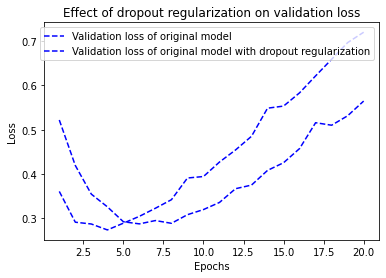

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of original model with dropout regularization")
plt.title("Effect of dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary